<a href="https://colab.research.google.com/github/JungAh12/Everyone_TF2.0/blob/master/BasicImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기초적인 이미지 분류 모델 학습
이 튜토리얼은 옷 이미지를 분류하는 신경망 모델을 훈련한다.

In [0]:
#2.0으로 설치해줘야함. 아니면 1.x버전 사용된다.
!pip install -q tensorflow-gpu==2.0.0-rc1

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.0.0-rc1'

#사용하려는 Data
10개의 category, 70000장의 28x28 픽셀의 grayscale image로 구성된 패션 MNIST 데이터셋을 사용한다.

숫자 손글씨 데이터인 MNIST 데이터셋을 대신해서 자주 사용된다.

training data로 60000장, test data로 10000장을 사용할 것이다.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


load_data() : 4개의 Numpy array를 반환한다.

image : 28x28 pixel(0~255)

label : 0 to 9

![image](https://user-images.githubusercontent.com/19795193/69650771-71f00580-10b2-11ea-891a-3142780670ef.png)

레이블이 클래스 명이 아니라 숫자로 되어있기 때문에 따로 만들어줘야한다.

In [0]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Analysis Dataset structure

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
test_labels.shape

(10000,)

In [13]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

#Data Preprocessing

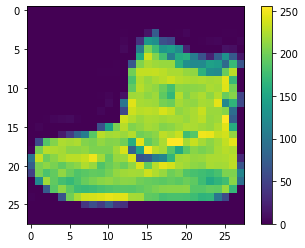

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()  #옆에 범례 나타냄
plt.grid(False) #True하면 이미지에 격자가 생긴다.
plt.show()

이미지를 보았을 때 0~ 255의 값임을 알 수 있다.

이미지 데이터들을 정규화하여 0~1 사이로 조정하자.

정규화를 해야 학습이 더 잘된다.

In [0]:
train_images = train_images/255.0   #Numpy array이기 때문에 broadcast가 가능하다.
test_images = test_images/255.0

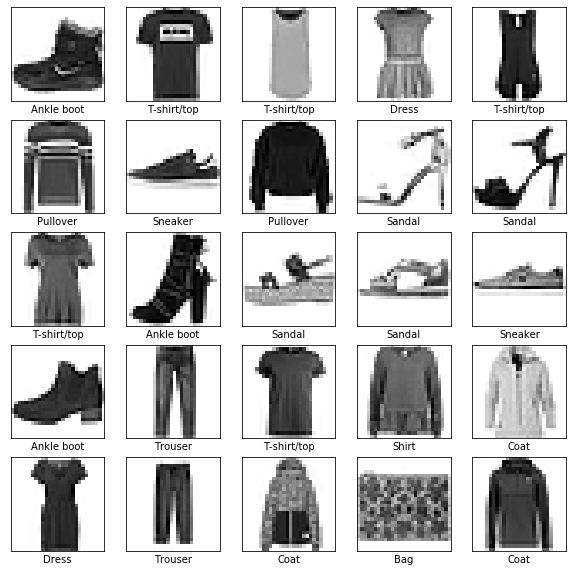

In [20]:
plt.figure(figsize=(10,10))

# 변형된 이미지 보기

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

#Model 구성

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

먼저 이미지는 2D array형태로 나타나기 때문에 이것을 1D로 바꿔주기 위해서 `keras.layers.Flatten()`레이어를 사용한다.
Flatten layer는 학습되는 weight param없이 데이터 변환만 해준다.

- 2D : 28 x 28
- 1D : 28*28 x 1 = 784 x 1

그 다음 Fully Connected layer인 `keras.layers.Dense()`레이어를 사용해서 첫번째 레이어에서는 128개의 뉴런을 가진 활성화함수 ReLu를 사용하는 Dense layer를 사용한다.

마지막 Dense layer는 output을 class 개수인 10개로 출력해내기 위해 10개 뉴런을 가진 레이어를 사용한다.

여기서 마지막 layer는 활성화함수로 **softmax**를 사용하는데, softmax를 사용하면 전체 원소의 합이 1인 확률값으로 반환하기 때문이다.

결과적으로 output으로 각 class의 확률값이 들어있는 10x1 vector가 output으로 나오게 된다.

#모델 컴파일
컴파일 단계에서는 다음 설정을 추가한다.
- loss function : model의 오차를 측정한다. 이 loss를 최소화해야한다.
- optimizer : data와 loss function을 바탕으로 model update 방법을 결정한다.(ex:RMSProp, Adam, etc.)
- metrics : 측정지표

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델 훈련하기

In [23]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.4946 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3709 - accuracy: 0.8659
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3349 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3115 - accuracy: 0.8855
Epoch 5/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2919 - accuracy: 0.8924


훈련 과정에서 최종적으로 loss가 0.2919, accuracy가 0.89%를 달성한 것을 확인하였다.

#정확도 평가

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 : ',test_acc)

10000/1 - 1s - loss: 0.2760 - accuracy: 0.8683

테스트 정확도 :  0.8683


### Test 단계가 Train 단계보다 정확도가 낮은 이유?
**overfitting(과적합)** 때문이다.

모델이 훈련했던 데이터에 fitting 하다보니 새로운 데이터에서는 성능이 낮아지는 것을 말한다.

#Prediction 만들기

In [0]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([4.6170214e-07, 3.0368568e-08, 4.3655188e-10, 1.3947196e-08,
       2.0108113e-08, 3.2602230e-03, 4.6017149e-07, 2.4508415e-03,
       6.8657619e-07, 9.9428731e-01], dtype=float32)

predictions에는 test dataset 내 이미지마다의 예측 output이 들어있다.

즉 10개 클래스에 대한 확률값(10x1)이 저장된 벡터가 10000개(test images 개수)들어있는 것이다.

In [27]:
np.argmax(predictions[0])

9

`np.argmax()`를 사용해서 predictions[0]의 가장 큰 값의 index를 가져온다.

test labels[0]의 값과 같으면 예측을 성공한 것이다.

In [28]:
test_labels[0]

9

###모든 데이터에 대한 예측을 그래프로 표현해보자

In [0]:
def plot_image(i, predictions_arr, true_label, img):
    predictions_arr, true_label, img = predictions_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_arr)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                         100*np.max(predictions_arr),
                                         class_name[true_label]),
                                         color=color)


In [0]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

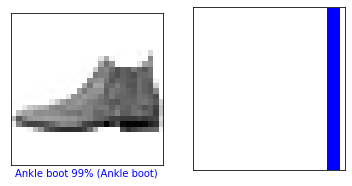

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(121)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predictions, test_labels)
plt.show()

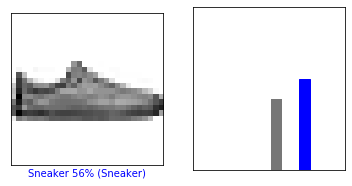

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(121)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predictions, test_labels)
plt.show()

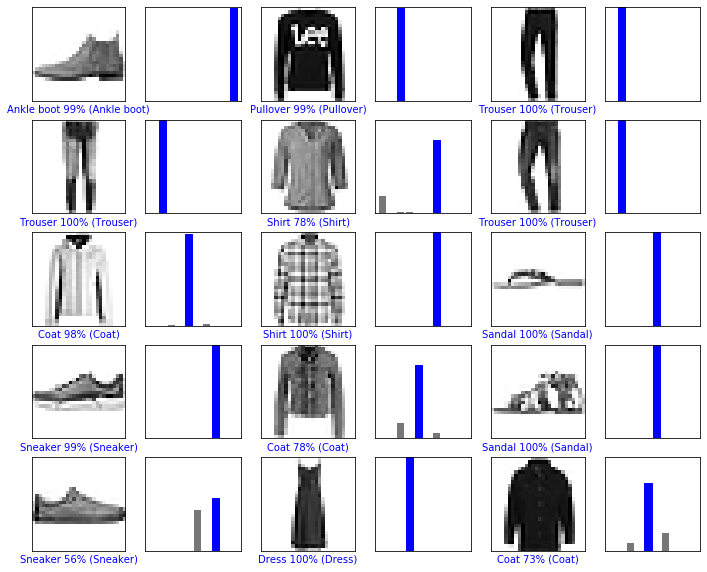

In [38]:
# 처음 X 개의 test 이미지와 prediction 레이블, true 레이블을 출력합니다
# correct = blue , wrong = red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
#이미지 데이터 하나에 대한 클래스 그래프 그리기
img = test_images[0]
print(img.shape)

(28, 28)


In [44]:
# keras는 배치로 예측 생성하는 것에 최적화되어있기 때문에 하나의 이미지를 사용하더라도 배치로 만든다.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)
print(predictions_single)

[[4.6170254e-07 3.0368565e-08 4.3655182e-10 1.3947169e-08 2.0108146e-08
  3.2602288e-03 4.6017320e-07 2.4508438e-03 6.8657738e-07 9.9428719e-01]]


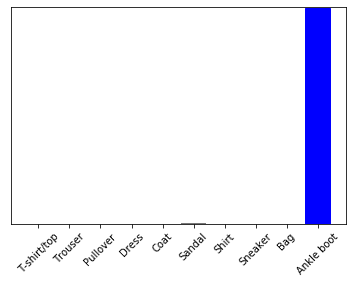

In [46]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

In [47]:
np.argmax(predictions_single[0])

9

예측 그래프에서 나타냈던대로 가장 높은 확률값의 인덱스도 label 9를 나타낸다.